## 尝试改变因子的分布来增强因子效果

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt

/mnt/datadisk2/aglv/anaconda3/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
cd /mnt/datadisk2/aglv/aglv/lab_aglv/forintern/

/mnt/datadisk2/aglv/aglv/lab_aglv/forintern


In [3]:
from DataDaily import DataDaily
datadaily = DataDaily()

load ./data_daily.h5...


In [19]:
vol = datadaily.volume
close = datadaily.adjclose
ret = close.pct_change()

In [28]:
r_win = 5

buy_l_order = datadaily.buy_value_large_order.loc[20210101:20221231]
sell_l_order = datadaily.sell_value_large_order.loc[20210101:20221231]
buy_xl_order = datadaily.buy_value_exlarge_order.loc[20210101:20221231]
sell_xl_order = datadaily.sell_value_exlarge_order.loc[20210101:20221231]

buy_s_order = datadaily.buy_value_small_order.loc[20210101:20221231]
sell_s_order = datadaily.sell_value_small_order.loc[20210101:20221231]

buy_l_order_act = datadaily.buy_value_large_order_act.loc[20210101:20221231]
buy_l_order_act_os = datadaily.buy_value_large_order_act.loc[20221231:20231231]
sell_l_order_act = datadaily.sell_value_large_order_act.loc[20210101:20221231]
buy_xl_order_act = datadaily.buy_value_exlarge_order_act.loc[20210101:20221231]
sell_xl_order_act = datadaily.sell_value_exlarge_order_act.loc[20210101:20221231]

buy_l_order_demean = buy_l_order / buy_l_order.rolling(r_win).mean()
sell_l_order_demean = sell_l_order / sell_l_order.rolling(r_win).mean()
buy_xl_order_demean = buy_xl_order / buy_xl_order.rolling(r_win).mean()
sell_xl_order_demean = sell_xl_order / sell_xl_order.rolling(r_win).mean()

buy_l_order_act_demean = buy_l_order_act / buy_l_order_act.rolling(r_win).mean()
sell_l_order_act_demean = sell_l_order_act / sell_l_order_act.rolling(r_win).mean()
buy_xl_order_act_demean = buy_xl_order_act / buy_xl_order_act.rolling(r_win).mean()
sell_xl_order_act_demean = sell_xl_order_act / sell_xl_order_act.rolling(r_win).mean()

buy_l_s_ratio = buy_l_order / buy_s_order
sell_l_s_ratio = sell_l_order / sell_s_order

In [5]:
factor_path = '/mnt/datadisk2/aglv/aglv/aglv_factor/fa_transform/'

In [6]:
fa = pd.read_csv('/mnt/datadisk2/aglv/aglv/aglv_factor/bs_book/exce_buy_l_order.csv').set_index('date')

In [9]:
fa.isna().sum(axis=1)

date
20210104    5644
20210105    1525
20210106    1526
20210107    1522
20210108    1517
            ... 
20231225     563
20231226     562
20231227     558
20231228     560
20231229     560
Length: 727, dtype: int64

In [24]:
fa['SH600000']

date
20210104            NaN
20210105   -2784.671507
20210106    6856.429258
20210107   -1568.276589
20210108   -4413.890250
               ...     
20231225    -237.997635
20231226     682.390645
20231227    -334.329926
20231228     105.827329
20231229    -338.719009
Name: SH600000, Length: 727, dtype: float64

In [9]:
fa.mean(axis=1)

date
20210104           NaN
20210105     17.053442
20210106    324.467973
20210107     84.441715
20210108    -76.467465
               ...    
20231225    -91.159320
20231226     -2.903270
20231227    128.768691
20231228    441.894209
20231229     55.277312
Length: 727, dtype: float64

In [8]:
fa4 = pd.read_csv(factor_path + 'exce_buy_l_per.csv').set_index('date')
fa4

,BJ430017,BJ430047,BJ430090,BJ430139,BJ430198,BJ430300,BJ430418,BJ430425,BJ430476,BJ430478,...,SZ301596,SZ301600,SZ301603,SZ301606,SZ301607,SZ301608,SZ301611,SZ301613,SZ301618,SZ301626
date,,,,,,,,,,,,,,,,,,,,,
20210104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20231225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20231226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20231227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
fa4 = fa4.replace(np.inf, np.nan)
fa4.mean(axis=1)

date
20210104         NaN
20210105    0.139508
20210106    0.551420
20210107    0.268094
20210108    0.091843
              ...   
20231225    0.308768
20231226    0.462635
20231227    0.483742
20231228    1.504017
20231229    0.509065
Length: 727, dtype: float64

In [20]:
eg = fa4.iloc[2, :]
(eg > eg.mean()).sum(), (eg < eg.mean()).sum(), eg.mean(), eg.median()

(575, 3503, 0.5514195783799158, 0.0003558799947371294)

In [17]:
fa5 = fa4.apply(lambda x: np.where(x > x.mean(), x, np.nan))

In [18]:
fa5.mean(axis=1)

date
20210104         NaN
20210105    1.192367
20210106    2.417059
20210107    1.620113
20210108    0.789322
              ...   
20231225    2.019023
20231226    2.007097
20231227    1.760798
20231228    3.197180
20231229    2.143083
Length: 727, dtype: float64

In [67]:
fa5.to_csv(factor_path + 'exce_buy_l_per_overmean.csv')

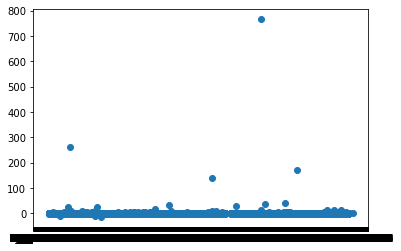

In [21]:
plt.scatter(eg.index, eg.values)

In [14]:
def factor_distribution_plot(data):
    '''
    将因子值二维数组转化为分布图形式
    '''
    import seaborn as sns

    if len(data.shape) > 1:
        data = data.stack()

    plt.figure(figsize=(10, 6))

    plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Histogram')
    sns.kdeplot(data, color='red', label='KDE')

    plt.title('Data Distribution')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

    plt.show()


In [47]:
def twist_factor(factor:pd.DataFrame):
    factor = ((factor.T - factor.median(axis=1)) / (factor.std(axis=1) + 1e-10)).T
    factor = factor.applymap(lambda x: x if x > 0 else -x)
    factor = ((factor.T - factor.mean(axis=1)) / (factor.std(axis=1) + 1e-10)).T
    return factor

/mnt/datadisk2/aglv/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/mnt/datadisk2/aglv/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


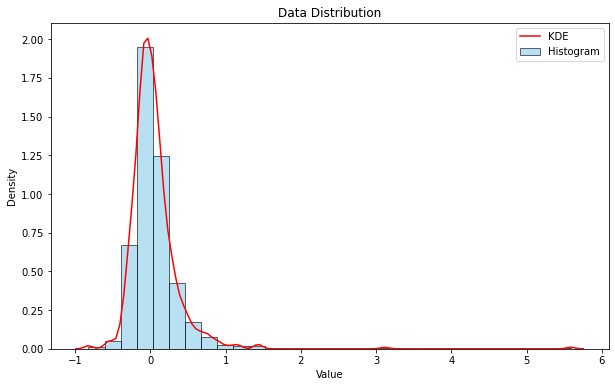

/mnt/datadisk2/aglv/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/mnt/datadisk2/aglv/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/mnt/datadisk2/aglv/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


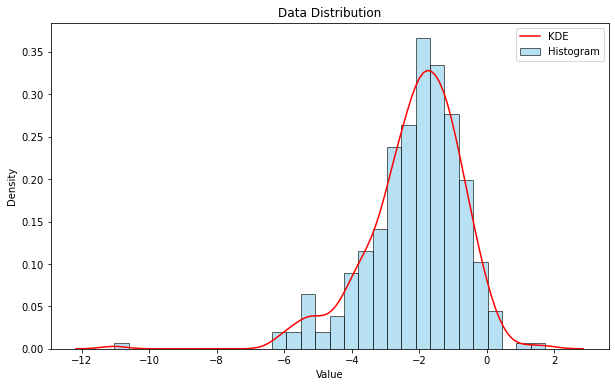

(None, None)

In [22]:
factor_distribution_plot(fa4['SH600000']), factor_distribution_plot(np.log(fa4['SH600000']))

In [23]:
(np.log(fa4)).to_csv(factor_path + 'exce_buy_l_per_log.csv')

<ipython-input-23-ab742cebaf5e>:1: RuntimeWarning: invalid value encountered in log
  (np.log(fa4)).to_csv(factor_path + 'exce_buy_l_per_log.csv')


/mnt/datadisk2/aglv/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/mnt/datadisk2/aglv/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


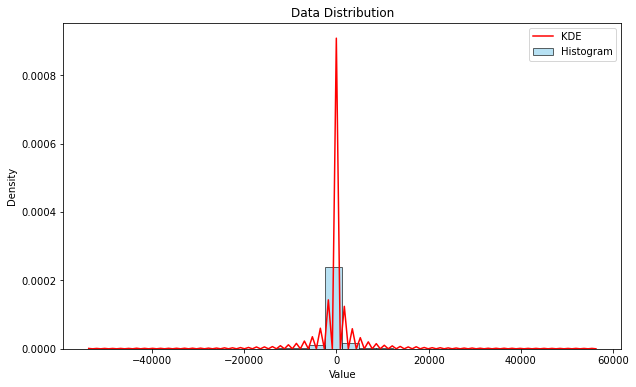

/mnt/datadisk2/aglv/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/mnt/datadisk2/aglv/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


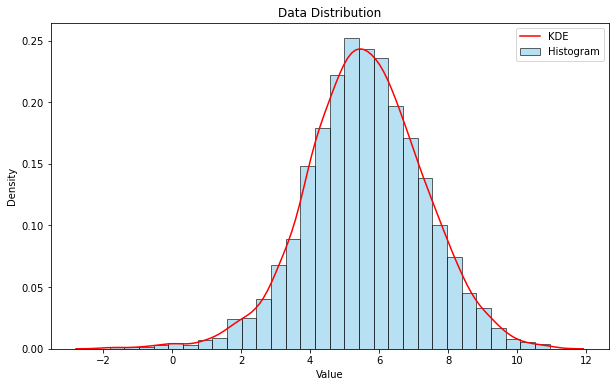

(None, None)

In [97]:
i = 4
factor_distribution_plot(fa.iloc[i, :]), factor_distribution_plot(np.log(fa.iloc[i, :].replace(0, np.nan).abs()))

In [13]:
import seaborn as sns
def factor_self_corr(factor:pd.DataFrame, gap=1, win=20):
    if len(factor.shape) < 1:
        if 'date' in factor.columns:
            factor = factor.set_index('date')
        elif 'Date' in factor.columns:
            factor = factor.set_index('Date')
    
    factor.index = [str(i) for i in factor.index]

    factor_corr = factor.rolling(win).apply(lambda x: x.corr(x.shift(-1)))

    plt.figure(figsize=(12, 6))
    plt.plot(factor_corr, color='#FF9999')
    plt.tight_layout()
    plt.xticks(ticks=range(0, len(factor_corr), max(1, len(factor_corr)//10)), 
               labels=factor_corr.index[::max(1, len(factor_corr)//10)], rotation=45)
    plt.title(f'Factor Self-rolling{win}-shift{gap}-Corr')
    plt.show()


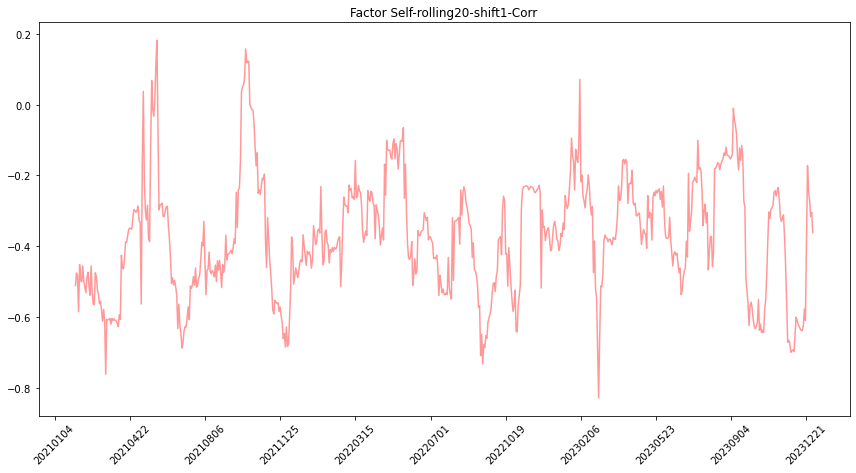

In [49]:
factor_self_corr(fa4['SH600000'])

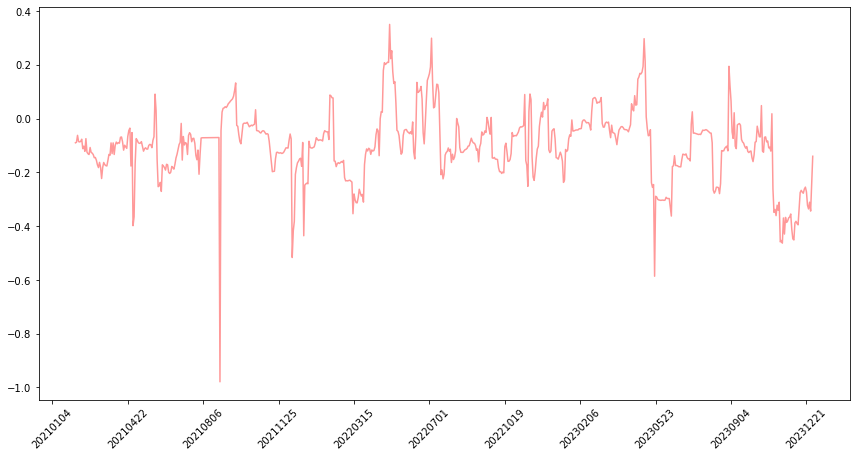

In [47]:
factor_self_corr(fa4['SH600000'] / fa4['SH600000'].rolling(3).mean())

In [12]:
def factor_plot(factor:pd.DataFrame, gap=1, win=20):
    if len(factor.shape) < 1:
        if 'date' in factor.columns:
            factor = factor.set_index('date')
        elif 'Date' in factor.columns:
            factor = factor.set_index('Date')
    
    factor.index = [str(i) for i in factor.index]

    plt.figure(figsize=(12, 6))
    plt.plot(factor, color='#FF9999')
    plt.tight_layout()
    plt.xticks(ticks=range(0, len(factor), max(1, len(factor)//10)), 
               labels=factor.index[::max(1, len(factor)//10)], rotation=45)
    plt.title(f'Factor Plot')
    plt.show()

In [34]:
factor_plot(fa4['SH600000'])

NameError: name 'factor_plot' is not defined

In [74]:
def ic_plot(factor:pd.DataFrame, ret):
    def get_ic_series(factor, ret):
        u = list(set(factor.columns).intersection(set(ret.columns)))
        ret = ret.loc[factor.index, u]
        icall = pd.DataFrame()
        fall = pd.merge(factor.stack(), ret.stack(), left_on=['date', 'InstrumentID'], right_on=['date', 'InstrumentID'])
        icall = fall.groupby('date').apply(lambda x : x.corr()['ret']).reset_index()
        icall = icall.dropna().drop(['ret'], axis=1).set_index('date')

        return icall
    
    ic_f = get_ic_series(factor, ret)
    ic_f.index = [str(i) for i in ic_f.index]
    f_name = ic_f.columns[0]
    fig = plt.figure(figsize=(12, 6))
    ax = plt.axes()
    xtick = np.arange(0, ic_f.shape[0], 20)
    xtick_label = pd.Series(ic_f.index[xtick])
    plt.bar(np.arange(ic_f.shape[0]), ic_f[f_name], color='darkred')
    
    ax1 = plt.twinx()
    ax1.plot(np.arange(ic_f.shape[0], ic_f.cumsum(), color='orange'))

    ax.set_xticks(xtick)
    ax.set_yticks(xtick_label)

    plt.show()

In [60]:
ret = datadaily.adjclose.pct_change()
ret

InstrumentID,BJ430017,BJ430047,BJ430090,BJ430139,BJ430198,BJ430300,BJ430418,BJ430425,BJ430476,BJ430478,...,SZ301596,SZ301600,SZ301603,SZ301606,SZ301607,SZ301608,SZ301611,SZ301613,SZ301618,SZ301626
date,,,,,,,,,,,,,,,,,,,,,
20171009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20241022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.053316,0.014305,0.012610,-0.017768,-0.045141,-0.002174,0.035220,NaN,0.033158,NaN
20241023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.042383,0.044325,-0.034403,-0.029395,-0.016302,-0.050245,-0.039948,NaN,-0.030121,NaN
20241024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.021497,0.020322,0.023169,0.017181,0.025331,0.005161,0.076242,NaN,-0.048815,NaN


In [86]:
pure_buy_l = pd.read_csv(factor_path + 'pure_buy_l.csv').replace(np.inf, np.nan).set_index('date')

In [89]:
pure_buy_l

,BJ430017,BJ430047,BJ430090,BJ430139,BJ430198,BJ430300,BJ430418,BJ430425,BJ430476,BJ430478,...,SZ301596,SZ301600,SZ301603,SZ301606,SZ301607,SZ301608,SZ301611,SZ301613,SZ301618,SZ301626
date,,,,,,,,,,,,,,,,,,,,,
20210104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20231225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20231226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20231227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


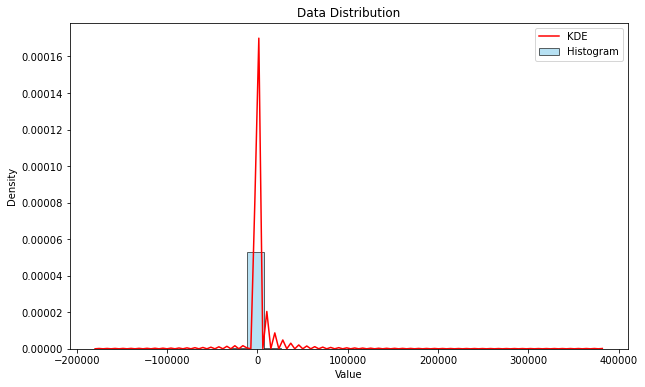

In [87]:
factor_distribution_plot(pure_buy_l)

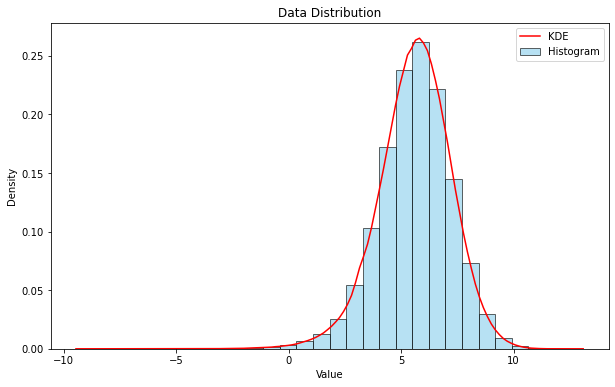

In [105]:
factor_distribution_plot(np.log(pure_buy_l.abs().replace(0, np.nan)))

In [104]:
(np.log(pure_buy_l.abs().replace(0, np.nan))).to_csv(factor_path + 'pure_buy_l_abs_log.csv')

In [113]:
pure_buy_l_per = pd.read_csv(factor_path + 'pure_buy_l_per.csv').replace(np.inf, np.nan).replace(-np.inf, np.nan).set_index('date')

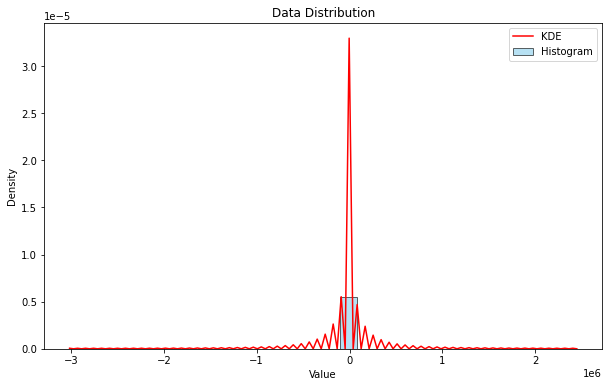

In [115]:
factor_distribution_plot(pure_buy_l_per)

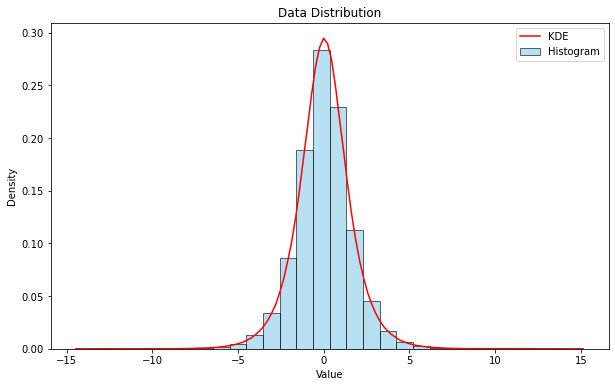

In [117]:
factor_distribution_plot(np.log(pure_buy_l_per.replace(0, np.nan).abs()))

In [123]:
(np.log(pure_buy_l_per.replace(0, np.nan))).to_csv(factor_path + 'pure_buy_l_per_log.csv')

<ipython-input-123-a0fed8f760f7>:1: RuntimeWarning: invalid value encountered in log
  (np.log(pure_buy_l_per.replace(0, np.nan))).to_csv(factor_path + 'pure_buy_l_per_log.csv')


In [134]:
pure_buy_l_per_log = np.log(pure_buy_l_per.replace(0, np.nan))
pure_buy_l_per_log_zs = ((pure_buy_l_per_log.T - pure_buy_l_per_log.mean(axis=1)) / pure_buy_l_per_log.std(axis=1) + 1e-10).T
pure_buy_l_per_log_zs

<ipython-input-134-d72d024a8049>:1: RuntimeWarning: invalid value encountered in log
  pure_buy_l_per_log = np.log(pure_buy_l_per.replace(0, np.nan))


,BJ430017,BJ430047,BJ430090,BJ430139,BJ430198,BJ430300,BJ430418,BJ430425,BJ430476,BJ430478,...,SZ301596,SZ301600,SZ301603,SZ301606,SZ301607,SZ301608,SZ301611,SZ301613,SZ301618,SZ301626
date,,,,,,,,,,,,,,,,,,,,,
20210104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20231225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20231226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20231227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
pure_buy_l_per_log_trans = -np.cos(pure_buy_l_per_log_zs)

In [139]:
pure_buy_l_per_log_trans.to_csv(factor_path + 'pure_buy_l_per_log_trans.csv')

In [17]:
b_os = datadaily.buy_value_large_order.loc[20190101:20201231]
s_os = datadaily.sell_value_large_order.loc[20190101:20201231]

In [32]:
pure_b_os = b_os - s_os
pure_b_os_per = (pure_b_os / pure_b_os.shift(1)).replace(np.inf, np.nan).replace(-np.inf,np.nan)
pure_b_os_log = np.log(pure_b_os.replace(0, np.nan))
pure_b_os_log_zs = ((pure_b_os_log.T - pure_b_os_log.mean(axis=1)) / (pure_b_os_log.std(axis=1) + 1e-10)).T
f_os = -np.cos(pure_b_os_log_zs)

<ipython-input-32-5407a0757dc1>:3: RuntimeWarning: invalid value encountered in log
  pure_b_os_log = np.log(pure_b_os.replace(0, np.nan))


In [33]:
f_os.mean(axis=1)

date
20190102   -0.630194
20190103   -0.627715
20190104   -0.626323
20190107   -0.621478
20190108   -0.624399
              ...   
20201225   -0.614215
20201228   -0.623680
20201229   -0.633133
20201230   -0.623190
20201231   -0.617016
Length: 487, dtype: float64

In [26]:
pure_b_os_log.to_csv(factor_path + 'pure_b_os_log.csv')

In [27]:
f_os.to_csv(factor_path + 'pure_buy_l_per_log_trans_os19to20.csv')

In [22]:
test = pd.read_csv(factor_path + 'pure_buy_l_per_log.csv').set_index('date').replace(np.inf, np.nan).replace(-np.inf, np.nan)

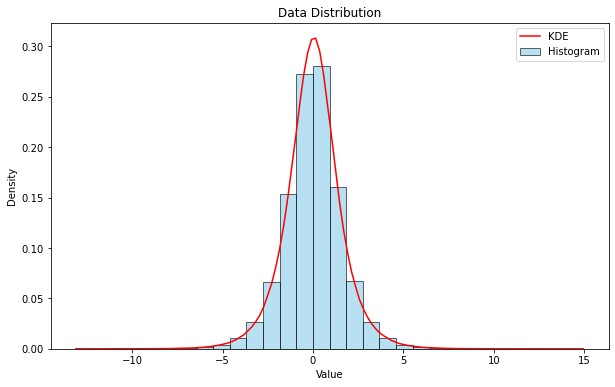

In [24]:
factor_distribution_plot(test)

In [26]:
pure_buy_l_per_log_trans = twist_factor(test)

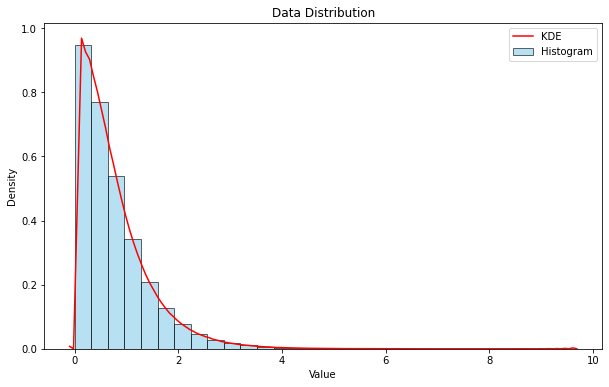

In [27]:
factor_distribution_plot(pure_buy_l_per_log_trans)

In [28]:
pure_buy_l_per_log_trans.to_csv(factor_path + 'pure_buy_l_per_log_trans.csv')

In [10]:
pure_ret_buy_is = buy_l_order / buy_l_order.shift(1) - sell_l_order / sell_l_order.shift(1)

<ipython-input-17-817c5c88a742>:2: RuntimeWarning: invalid value encountered in log
  factor_distribution_plot(np.log(pure_ret_buy_is.replace(0, np.nan)))


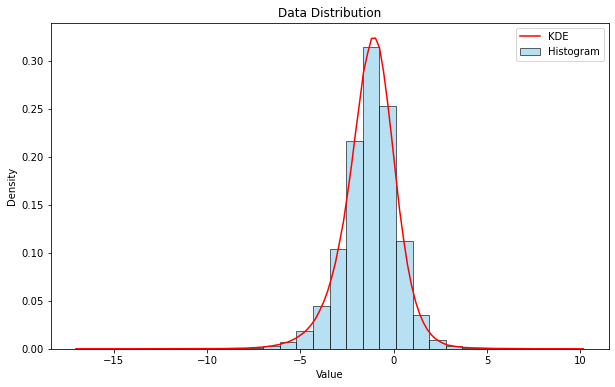

In [17]:
pure_ret_buy_is = pure_ret_buy_is.replace(np.inf, np.nan).replace(-np.inf, np.nan)
factor_distribution_plot(np.log(pure_ret_buy_is.replace(0, np.nan)))

In [18]:
pure_ret_buy_is.to_csv(factor_path + 'pure_ret_buy_is.csv')
np.log(pure_ret_buy_is.replace(0, np.nan)).to_csv(factor_path + 'pure_ret_buy_is_log.csv')

<ipython-input-18-8cd1ab3b347c>:2: RuntimeWarning: invalid value encountered in log
  np.log(pure_ret_buy_is.replace(0, np.nan)).to_csv(factor_path + 'pure_ret_buy_is_log.csv')


In [20]:
pure_buy_ret = (buy_l_order - sell_l_order) * ret.loc[20210101:20221231]

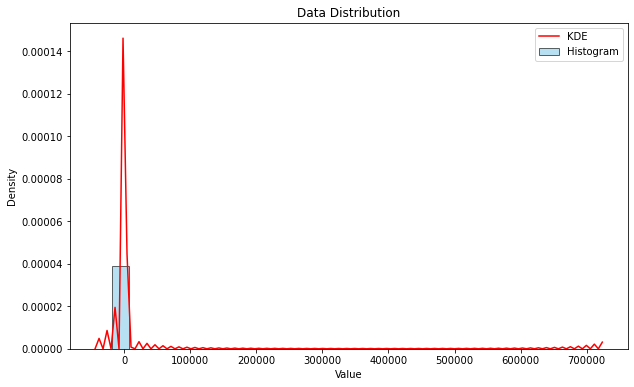

In [21]:
factor_distribution_plot(pure_buy_ret)

<ipython-input-22-a0d904f9fc31>:1: RuntimeWarning: invalid value encountered in log
  factor_distribution_plot(np.log(pure_buy_ret.replace(0, np.nan)))


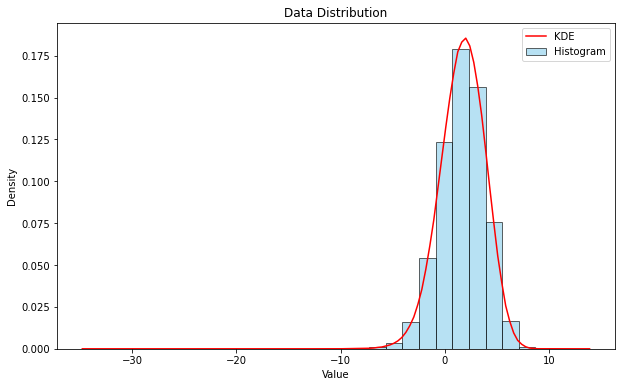

In [22]:
factor_distribution_plot(np.log(pure_buy_ret.replace(0, np.nan)))

In [23]:
np.log(pure_buy_ret.replace(0, np.nan)).to_csv(factor_path + 'pure_buy_ret_log.csv')

<ipython-input-23-2b6044a344f9>:1: RuntimeWarning: invalid value encountered in log
  np.log(pure_buy_ret.replace(0, np.nan)).to_csv(factor_path + 'pure_buy_ret_log.csv')


In [35]:
buy_ret_act = buy_l_order_act * ret.loc[20210101:20221231]

In [48]:
buy_ret_act_trans2 = twist_factor(buy_ret_act)

<ipython-input-51-750a9f65a0bd>:1: RuntimeWarning: invalid value encountered in log
  factor_distribution_plot(np.log(buy_ret_act_trans2.replace(0, np.nan)))


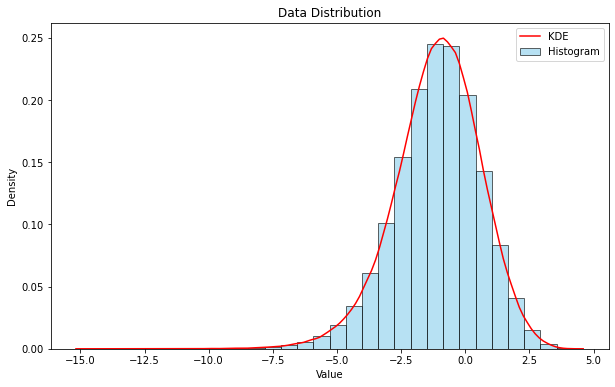

In [51]:
factor_distribution_plot(np.log(buy_ret_act_trans2.replace(0, np.nan)))

In [52]:
np.log(buy_ret_act_trans2.replace(0, np.nan)).to_csv(factor_path + 'buy_ret_act_trans2_log.csv')

<ipython-input-52-e2e1ce179145>:1: RuntimeWarning: invalid value encountered in log
  np.log(buy_ret_act_trans2.replace(0, np.nan)).to_csv(factor_path + 'buy_ret_act_trans2_log.csv')


In [46]:
for i in [3, 5, 10]:
    buy_ret_r_mean = buy_l_order_act * ret.loc[20210101:20221231]
    buy_ret_r_mean = buy_ret_r_mean.rolling(i).mean()
    buy_ret_r_mean.to_csv(factor_path + f'buy_ret_act_r{i}mean.csv')

In [53]:
buy_per_ret = (buy_l_order / buy_l_order.shift(1)) * ret.loc[20210101:20221231]

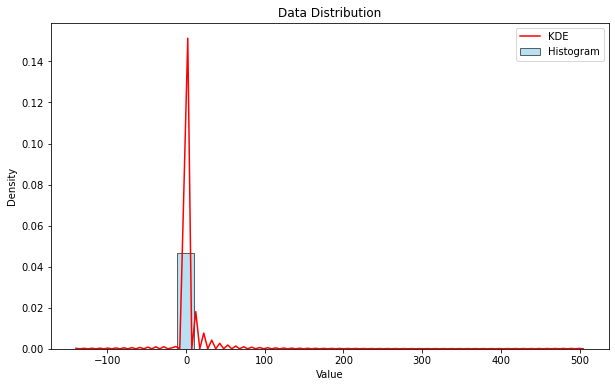

In [55]:
buy_per_ret = buy_per_ret.replace(np.inf, np.nan).replace(-np.inf, np.nan)
factor_distribution_plot(buy_per_ret)

<ipython-input-56-6f43163821b2>:1: RuntimeWarning: invalid value encountered in log
  buy_per_ret_log = np.log(buy_per_ret.replace(0, np.nan))


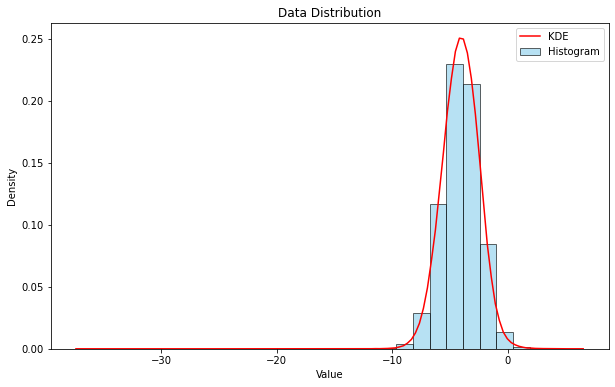

In [56]:
buy_per_ret_log = np.log(buy_per_ret.replace(0, np.nan))
factor_distribution_plot(buy_per_ret_log)

In [57]:
buy_per_ret_log.to_csv(factor_path + 'buy_per_ret_log.csv')
buy_per_ret.to_csv(factor_path + 'buy_per_ret.csv')